## Exploratory Data Analysis-12
https://docs.google.com/spreadsheets/d/1gy8EneZYWfgW1pYfDRszQ8wXDfAHxm6B/edit?usp=sharing&ouid=101109206230394672482&rtpof=true&sd=true

In [ ]:
# # Shape of the dataset
# df.shape

# # Checking noise values
# for i in df.columns:
#     print(i,'\n', df[i].sort_values().unique())
    
# # Checking null values
# df.isnull().sum()

# # Checking duplicates
# df[df.duplicated()==True]

# # Checking data types
# df.dtypes

# # 5-point summary
# df.describe()

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Reading the dataset
df=pd.read_csv('E:/Exploratory_Data_Analysis/EDA_12_Pizza_Sales.csv')

In [20]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [21]:
# 1.	How many rows and columns are there in the dataset?
df.shape

(48620, 12)

In [22]:
# 2.	What are the data types of each column?
df.dtypes
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_time']=df['order_time'].astype('datetime64')

C:\Users\Dharmendra Kumar\AppData\Local\Temp\ipykernel_2660\2834330768.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['order_date'] = pd.to_datetime(df['order_date'])


In [24]:
# 3.	Are there any missing values in the dataset? If yes, handle them appropriately.
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [25]:
# 4.	Calculate the summary statistics for numeric columns (e.g., quantity, unit_price).
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [26]:
# 5.	What is the average total_price of all orders?
df['total_price'].mean()

16.821473673385437

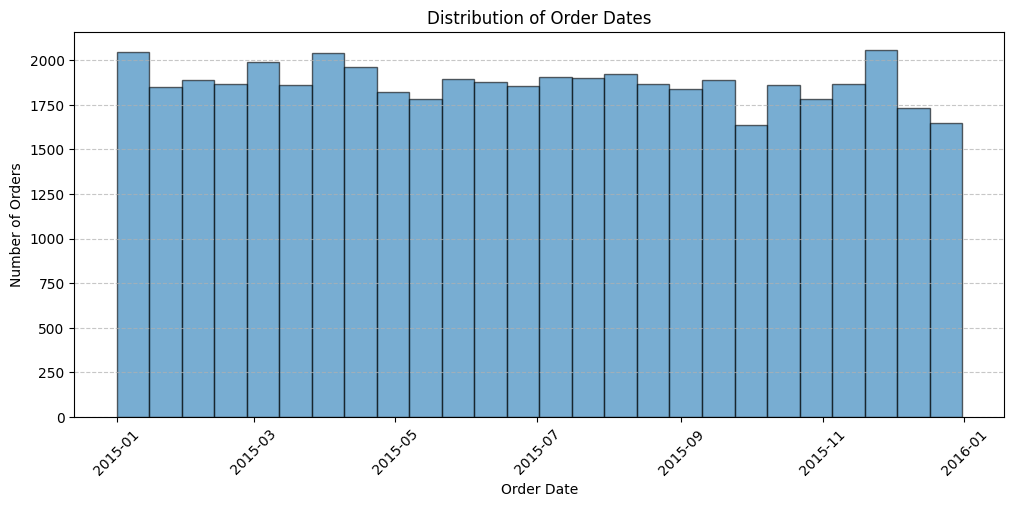

In [34]:
# 6.	Visualize the distribution of order_date.

# Histogram 
plt.figure(figsize=(12, 5))
plt.hist(df['order_date'], bins=26, edgecolor='k', alpha=0.6)
plt.title('Distribution of Order Dates')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [47]:
# 7.	Which day of the week has the highest total sales?

x7=df.loc[:,['order_date','total_price']]
x7['day_of_week'] = df['order_date'].dt.day_name()

res7=x7.groupby('day_of_week')['total_price'].sum().reset_index()
res7=res7.sort_values('total_price', ascending=False)
res7.iloc[0,:]

day_of_week      Friday
total_price    129690.9
Name: 0, dtype: object

In [51]:
# 8.	List the unique pizza categories in the dataset.
list(df['pizza_category'].unique())

['Classic', 'Veggie', 'Supreme', 'Chicken']

In [54]:
# 9.	For each pizza category, calculate the average quantity ordered.

x9=df.groupby('pizza_category')['quantity'].mean().reset_index()
x9.columns = ['pizza_category', 'avg_qty']
x9

,pizza_category,avg_qty
0,Chicken,1.021729
1,Classic,1.021195
2,Supreme,1.017831
3,Veggie,1.017469


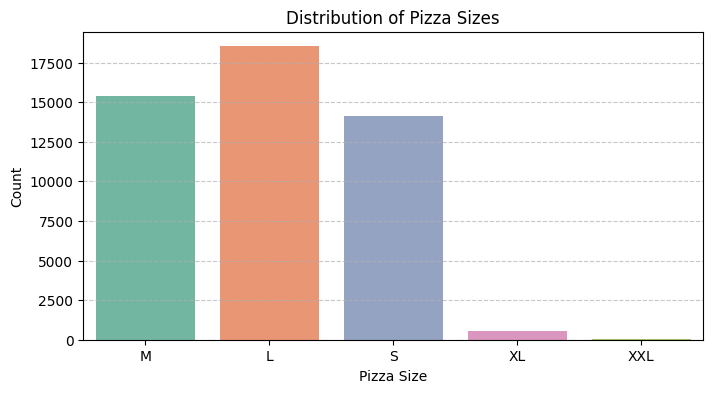

In [61]:
# 10.	Visualize the distribution of pizza sizes.

# Countplot
plt.figure(figsize=(8, 4))
sns.countplot(df, x='pizza_size', palette='Set2')
plt.title('Distribution of Pizza Sizes')
plt.xlabel('Pizza Size')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [63]:
# 11.	What is the most common pizza size?
x11 = df['pizza_size'].value_counts()
res11 = x11.idxmax()
res11

'L'

In [66]:
# 12.	Calculate the total sales revenue for each pizza category.

x12=df.groupby('pizza_category')['total_price'].sum().reset_index()
x12.columns = ['pizza_category', 'total_sales_revenue']
x12

,pizza_category,total_sales_revenue
0,Chicken,195919.50
1,Classic,220053.10
2,Supreme,208197.00
3,Veggie,193690.45


In [73]:
# 13.	Identify the top 5 pizza ingredients used.

x13=df['pizza_ingredients'].value_counts().reset_index()
x13.columns=['pizza_ingredients','frequency']
res13=x13.sort_values('frequency', ascending=False)
res13.head()

,pizza_ingredients,frequency
0,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2416
1,"Barbecued Chicken, Red Peppers, Green Peppers,...",2372
2,"Sliced Ham, Pineapple, Mozzarella Cheese",2370
3,"Mozzarella Cheese, Pepperoni",2369
4,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",2315


In [86]:
# 14.	Create a new column 'month' derived from 'order_date' and analyze the monthly sales trends.

df['month']=df['order_date'].dt.month

x14=df.groupby('month')['total_price'].sum().reset_index()

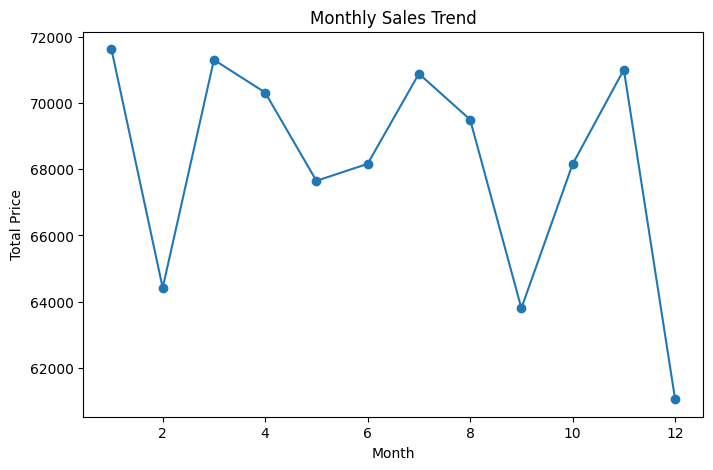

In [84]:
# Line plot
plt.figure(figsize=(8,5))
plt.plot(x14['month'], x14['total_price'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

In [85]:
# 15.	Calculate the total sales revenue for each month.
x15=df.groupby('month')['total_price'].sum().reset_index()
x15

,month,total_price
0,1,71620.15
1,2,64419.45
2,3,71301.40
3,4,70312.00
4,5,67648.80
5,6,68161.45
6,7,70880.65
7,8,69497.30
8,9,63803.70
9,10,68152.20


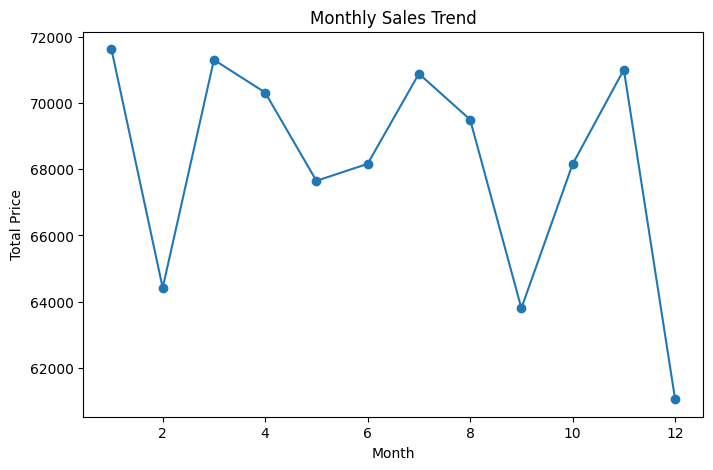

In [87]:
# 16.	Visualize the sales trend over months using a line plot.
# Line plot
plt.figure(figsize=(8,5))
plt.plot(x15['month'], x15['total_price'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

In [89]:
# 17.	Calculate the correlation between 'quantity' and 'total_price'.
df[['quantity', 'total_price']].corr()

,quantity,total_price
quantity,1.000000,0.541926
total_price,0.541926,1.000000


In [99]:
# 18.	Find the pizza with the highest unit price.

max_ = df['unit_price'].max()
x18=df[df['unit_price'] == max_].iloc[0,-2]
x18, max_

('The Greek Pizza', 35.95)

In [104]:
# 19.	Calculate the total sales for each day.

x19=df.groupby('order_date')['total_price'].sum().reset_index()
x19.columns = ['Order Date', 'Total Sales']
x19.head()

,Order Date,Total Sales
0,2015-01-01,2713.85
1,2015-01-02,3189.20
2,2015-01-03,1598.55
3,2015-01-04,2176.85
4,2015-01-05,2571.95


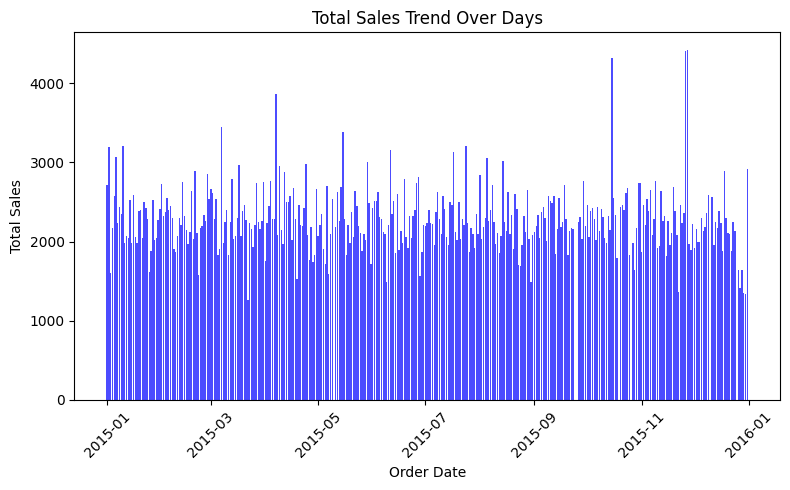

In [110]:
# 20.	Visualize the total sales trend over days using a bar chart.
# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(x19['Order Date'], x19['Total Sales'], color='blue', alpha=0.7)
plt.title('Total Sales Trend Over Days')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [114]:
# 21.	Identify the top 5 pizza names based on the quantity ordered.

x21=df.groupby('pizza_name')['quantity'].sum().reset_index()
res21=x21.sort_values('quantity', ascending=False)
res21.head()

,pizza_name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371


In [116]:
# 22.	What is the average unit price for each pizza category?

x22=df.groupby('pizza_category')['unit_price'].mean().reset_index()
x22.columns=['pizza_category','Avg_unit_price']
x22

,pizza_category,Avg_unit_price
0,Chicken,17.709408
1,Classic,14.797490
2,Supreme,17.363229
3,Veggie,16.612639


In [121]:
# 23.	Find the top 3 pizza ingredients that appear the most frequently.

x23=df['pizza_ingredients'].value_counts().reset_index()
x23.columns=['pizza_ingredients','Frequency']
x23.head(3)

,pizza_ingredients,Frequency
0,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2416
1,"Barbecued Chicken, Red Peppers, Green Peppers,...",2372
2,"Sliced Ham, Pineapple, Mozzarella Cheese",2370


In [122]:
# 24.	Calculate the average total_price for each pizza size.

x24=df.groupby('pizza_size')['total_price'].mean().reset_index()
x24.columns=['pizza_size','Avg_total_price']
x24

,pizza_size,Avg_total_price
0,L,20.259025
1,M,16.209441
2,S,12.596484
3,XL,25.875000
4,XXL,35.950000


In [125]:
# 25.	Identify the top 3 pizza categories with the highest total sales.

x25=df.groupby('pizza_category')['total_price'].sum().reset_index()
x25.columns=['pizza_category','Total_sales']
res25=x25.sort_values(by='Total_sales', ascending=False)
res25

,pizza_category,Total_sales
1,Classic,220053.10
2,Supreme,208197.00
0,Chicken,195919.50
3,Veggie,193690.45


In [100]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'month'],
      dtype='object')

In [79]:
df.head(2)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month
0,1,1,hawaiian_m,1,2015-01-01,2023-09-10 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1
1,2,2,classic_dlx_m,1,2015-01-01,2023-09-10 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1
